In [55]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
b=pd.read_csv('C:\\Users\\ABHIRAJ\\Desktop\\DATA SETS\\insurance.csv')

In [57]:
b.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
from sklearn.linear_model import Ridge

In [33]:
from sklearn import preprocessing

In [34]:
number = preprocessing.LabelEncoder()
b['smoker'] = number.fit_transform(b.smoker)

In [35]:
x=b[['age','bmi','children','charges']]
y=b['smoker']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [38]:
rd=Ridge()

In [39]:
rd.fit(x_train,y_train)

Ridge()

In [40]:
y_pred=rd.predict(x_test)

In [41]:
y_pred[0:5]

array([ 0.53355532,  0.06662543,  0.07929699, -0.03858972, -0.05537006])

In [42]:
y_test.head()

92      1
1150    0
236     0
230     0
782     0
Name: smoker, dtype: int32

In [43]:
mse=np.mean((y_pred-y_test)**2)

In [44]:
mse

0.04999249675503629

In [46]:
rd_coef=pd.DataFrame()
rd_coef["columns"]=x_train.columns
rd_coef['coefficient estimate']=pd.Series(rd.coef_)

In [48]:
rd_coef.head()

,columns,coefficient estimate
0,age,-0.008510
1,bmi,-0.008447
2,children,-0.007430
3,charges,0.000030


In [49]:
print(rd_coef)

    columns  coefficient estimate
0       age             -0.008510
1       bmi             -0.008447
2  children             -0.007430
3   charges              0.000030


In [52]:
rd.coef_

array([-8.50955622e-03, -8.44713385e-03, -7.43004253e-03,  2.98092795e-05])

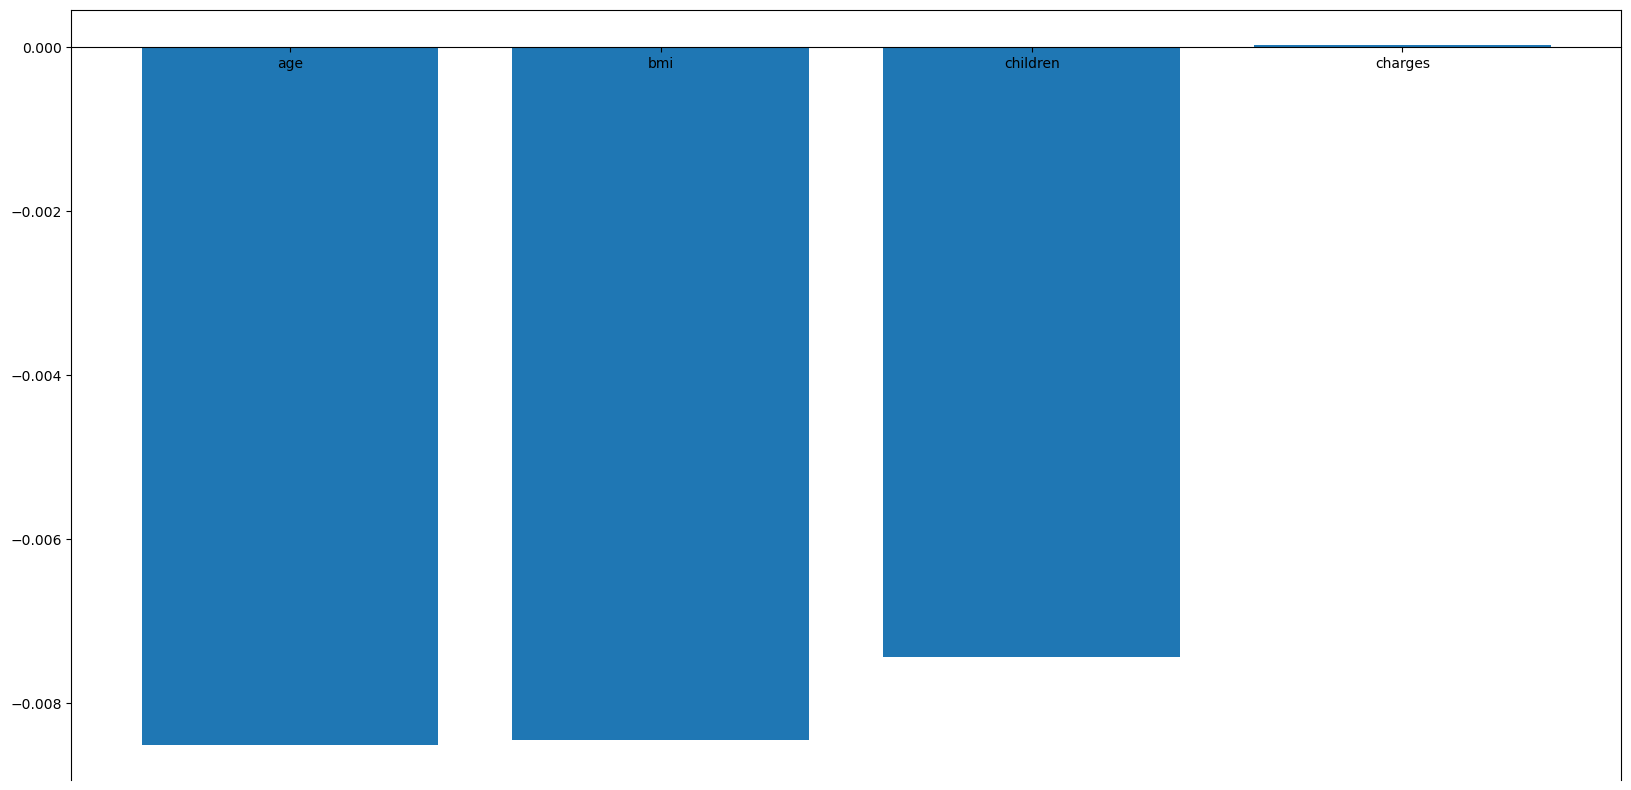

In [68]:

fig, ax=plt.subplots(figsize=(20,10))
ax.bar(rd_coef['columns'],rd_coef['coefficient estimate'])
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

<BarContainer object of 4 artists>

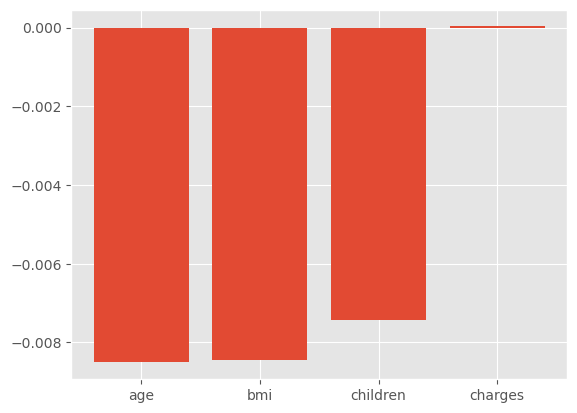

In [72]:
plt.bar(rd_coef['columns'],rd_coef['coefficient estimate'])